# 생체 광학 데이터 분석 AI 경진대회

https://dacon.io/competitions/official/235608/overview/description

### 라이브러리 불러오기 및모듈 설치
- '!'를 붙혀서 모듈을 설치하면 현재 이 폴더에서만 작동하는 모듈을 설치한다.

In [1]:
# 모듈설치

!pip install lightgbm

In [2]:
# lib 불러오기

#--판다스와넘파이--#
import pandas as pd
import numpy as np

#--시각화(이미지)--#
import seaborn as sns
import matplotlib.pyplot as plt

#--머신러닝--#
import lightgbm as lgb
from lightgbm import LGBMRegressor

#--검증평가(교차검증값)--#
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor  # 이 친구는 칼럼을 통틀어서 계산할 때 자주 사용함.
from sklearn.metrics import mean_absolute_error

#--기타(시간측정 및 계산)--#
# 반복문을 쓰는 것 보다 이 친구가 속도가 더 빠르다
from tqdm import tqdm
# 불필요한 에러를 제거하는 라이브러리
import warnings ; warnings.filterwarnings('ignore') # ignore : 무시해라

### 데이터 불러오기
- 해당 파일이 위치해있는 경로로 부르기
- 같은 위치에 있으면 파일로 부르기

In [3]:
train = pd.read_csv(r'train.csv')
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


### 데이터 분석

In [4]:
# 지정되어있는 collections 보기

train['rho'].unique()

array([25, 10, 15, 20], dtype=int64)

In [5]:
# 데이터 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

<AxesSubplot:>

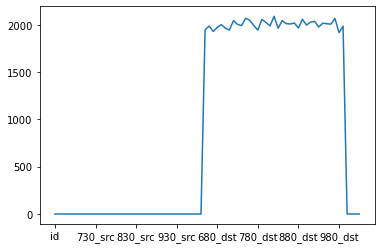

In [6]:
# 데이터의 빈값을 시각화로 확인하기 : 붕 떠있는 친구가 빈 값

train.isnull().sum().plot()

In [7]:
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
columns = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
           '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
           '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
           '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
           '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
           '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']

In [9]:
# 원하는 값(단어)으로 추출하기
# '$'을 넣어 줘야 한다.

train_dst = train.filter(regex='_dst$', axis='columns')
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

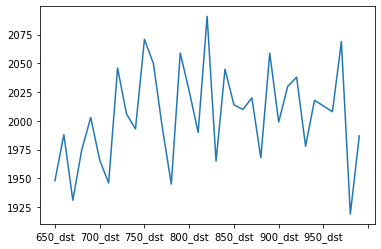

In [10]:
# filter 한 값을 시각화로 확인하기

train.filter(regex='_dst$', axis='columns').isnull().sum().plot()

In [11]:
# 잘리는 칼럼을 인덱스로 바꿔서 데이터 확인하기
# 전치행렬

train.filter(regex='_dst$', axis='columns').head().T

,0,1,2,3,4
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,NaN,NaN
670_dst,0.000000e+00,0.000000e+00,NaN,5.345363e-11,0.000000e+00
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13
690_dst,1.098559e-17,1.025259e-10,NaN,1.881458e-11,0.000000e+00
700_dst,8.907142e-19,0.000000e+00,NaN,3.617201e-11,0.000000e+00
710_dst,NaN,0.000000e+00,8.981651e-19,7.909656e-13,1.056991e-13
720_dst,0.000000e+00,0.000000e+00,1.944683e-19,NaN,0.000000e+00
730_dst,NaN,NaN,8.126907e-19,1.583839e-10,0.000000e+00
740_dst,0.000000e+00,0.000000e+00,2.183200e-19,NaN,2.666663e-14


<AxesSubplot:>

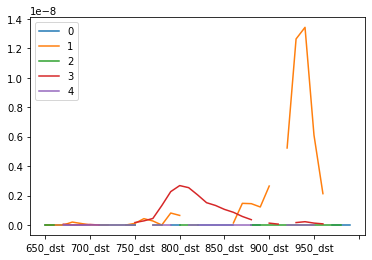

In [12]:
# 전치행렬한 값을 시각화하기

train.filter(regex='_dst$', axis='columns').head().T.plot()

<AxesSubplot:>

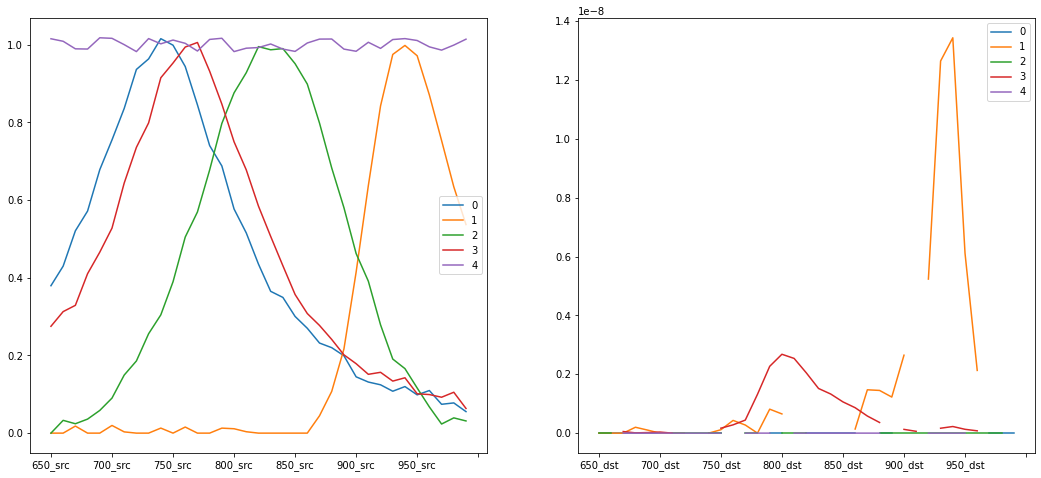

In [13]:
# 한 화면에 dst, src의 결과 다 뽑아보기
# 투과율과 흡광율이 다르다.. (770 부분을 보자 - 요걸 라만효과라고도 부른다.) : 왼쪽의 시각화데이터는 투광률, 오른쪽은 흡광률

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)
train.filter(regex='_src$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax2)

<AxesSubplot:>

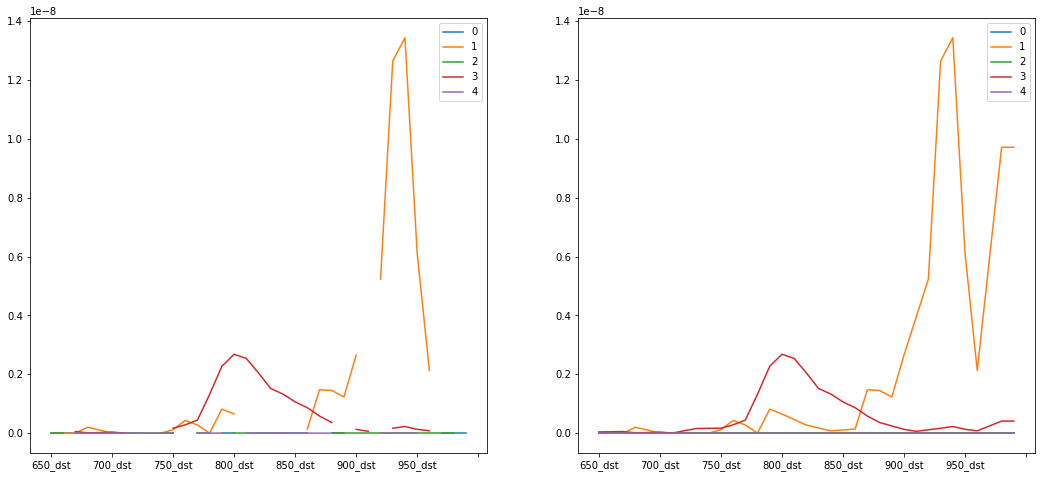

In [14]:
# Interpolation(보간) 하기 ( linear : 근처의 값을 가져와서 직선긋기 )

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.interpolate(method='linear', axis=0).plot(ax=ax2)

In [15]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [16]:
# 칼럼 array로 만들기

650 + np.arange(35)*10

array([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
       910, 920, 930, 940, 950, 960, 970, 980, 990])

In [17]:
# 칼럼 list로 만들기

list(650 + np.arange(35)*10)

[650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [18]:
train_dst = train.filter(regex='_dst$', axis='columns')
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

<AxesSubplot:>

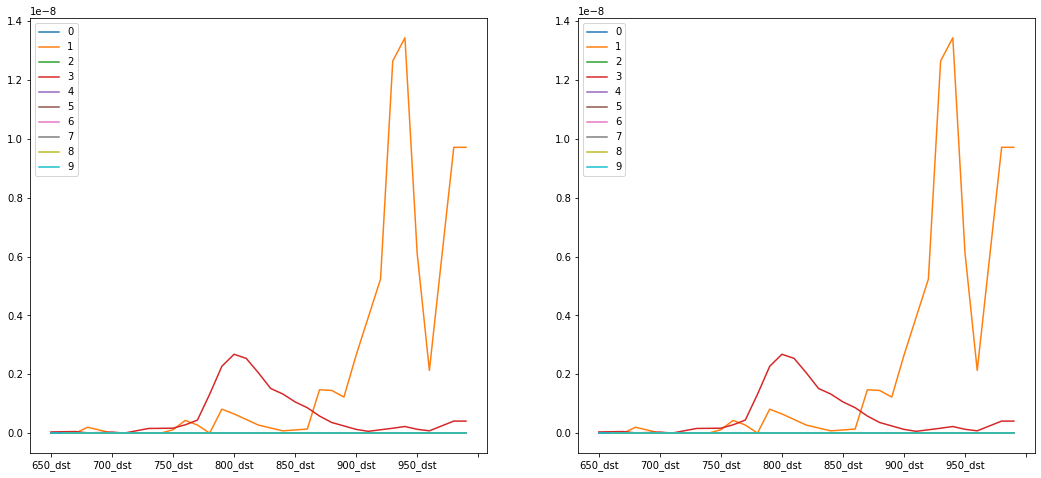

In [19]:
# interpolate

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)
train_dst.interpolate(methods='linear', axis=1).head(10).T.plot(ax=ax1)
train_dst.interpolate(methods='polynomaial', order=3, axis=1).head(10).T.plot(ax=ax2)

<AxesSubplot:>

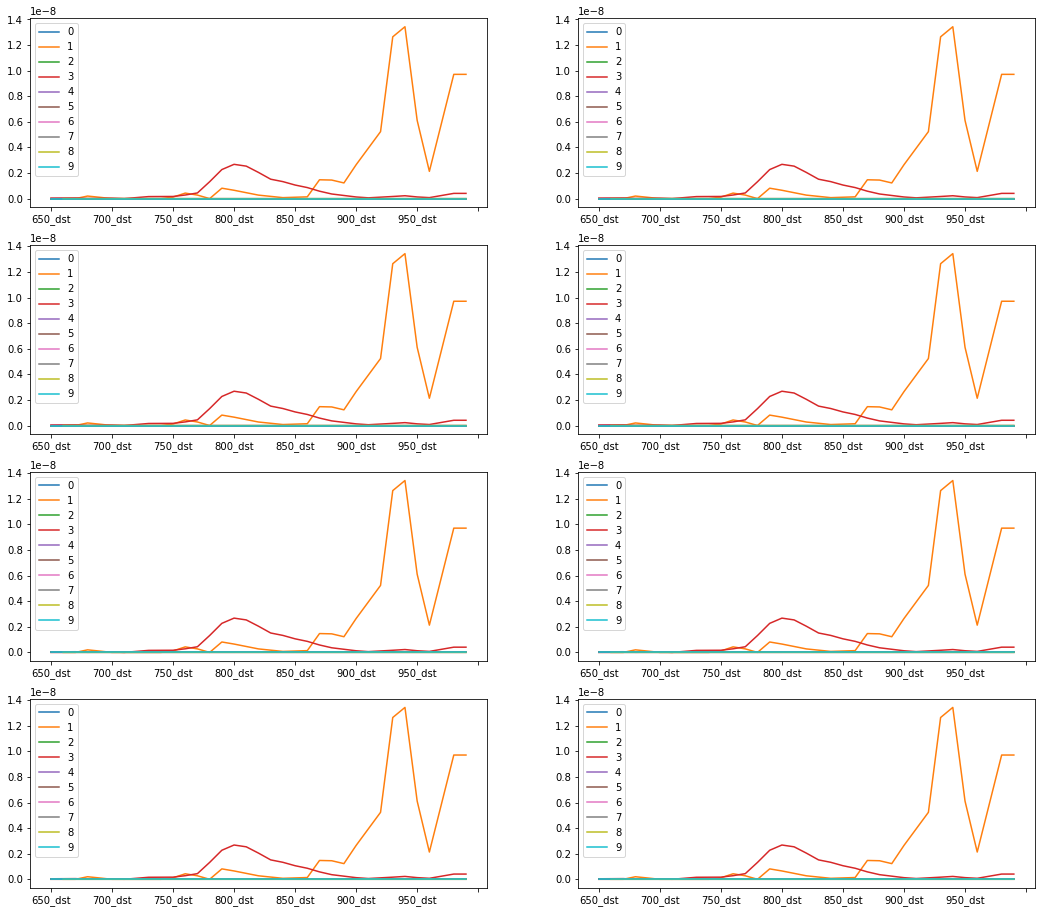

In [20]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)
i = 10
train_dst.interpolate(methods='linear', axis=1).head(i).T.plot(ax=ax1)
train_dst.interpolate(methods='nearest', axis=1).head(i).T.plot(ax=ax2)
train_dst.interpolate(methods='zero', axis=1).head(i).T.plot(ax=ax3)
train_dst.interpolate(methods='slinear', axis=1).head(i).T.plot(ax=ax4)
train_dst.interpolate(methods='quadratic', axis=1).head(i).T.plot(ax=ax5)
train_dst.interpolate(methods='cubic', axis=1).head(i).T.plot(ax=ax6)
train_dst.interpolate(methods='spline', order=3, axis=1).head(i).T.plot(ax=ax7)
train_dst.interpolate(methods='polynomaial', order=3, axis=1).head(i).T.plot(ax=ax8)

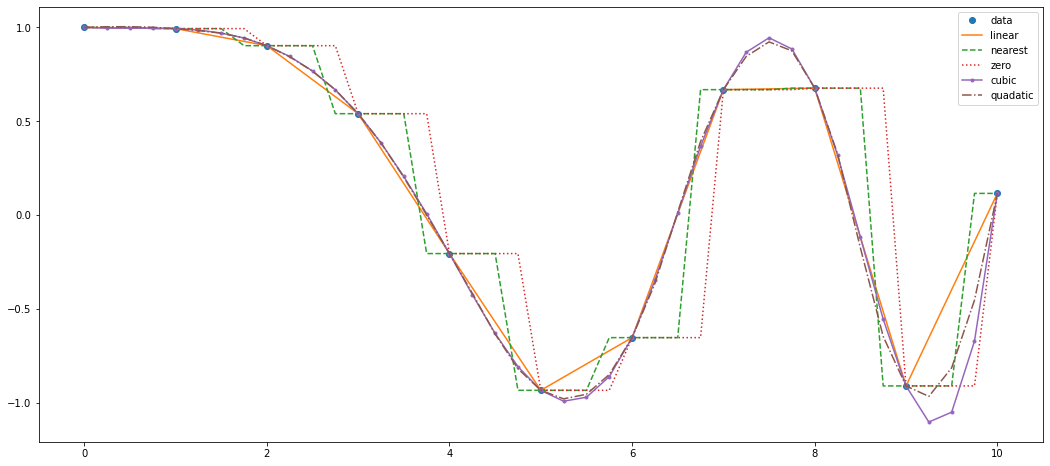

In [21]:
# 그래프 그리기 ( interpolate 1차원 )

from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9)
f1 = interp1d(x,y) # 직선 (linear)
f2 = interp1d(x,y,kind='nearest')
f3 = interp1d(x,y,kind='zero')
f4 = interp1d(x,y,kind='cubic')
f5 = interp1d(x,y,kind='quadratic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.figure(figsize=(18,8))
# byte 형식으로 들어가는건 점선의 모양
plt.plot(x,y,'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':', xnew, f4(xnew), '.-', xnew, f5(xnew), '-.')
plt.legend(['data','linear','nearest','zero','cubic','quadatic'], loc='best')
plt.show()

In [22]:
train.filter(regex='_dst$', axis='columns').columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [23]:
train_dst_i = train_dst.interpolate(methods='linear', axis=1)
train_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [24]:
# spline, polynomail 을 사용하면 interpolate 괄호 안에 order 를 꼭 넣어줘야 한다.
# 예 ) interpolate(methods='polynomail', axis=1, order=3)

train_dst_i = train_dst.interpolate(methods='linear', axis=1) # linear 보간을 완료
train_dst_i.columns = train.filter(regex='_dst$', axis='columns').columns # 숫자 컬럼에서 문자 컬럼으로 변경
train_dst_i.columns 

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [25]:
test = pd.read_csv('test.csv')
test.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [26]:
# Test 보간

test_dst = test.filter(regex='_dst$', axis='columns')
test_dst_i = test_dst.interpolate(methods='linear', axis=1) # linear 보간을 완료
test_dst_i.columns = test.filter(regex='_dst$', axis='columns').columns # 숫자 컬럼에서 문자 컬럼으로 변경
test_dst_i.columns 

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

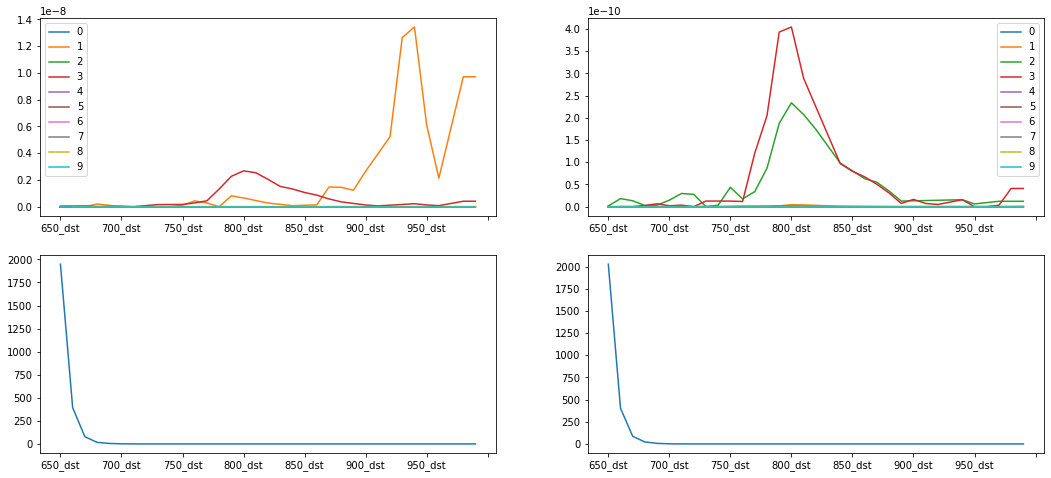

In [27]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)
i = 10
train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

In [28]:
for i in range(34):
    train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(), 
                    f'{980-(i*10)}_dst'] = train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(),
                                                           f'{990-(i*10)}_dst']
    test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(),
                   f'{980-(i*10)}_dst'] = test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(),
                                                         f'{990-(i*10)}_dst']

<AxesSubplot:>

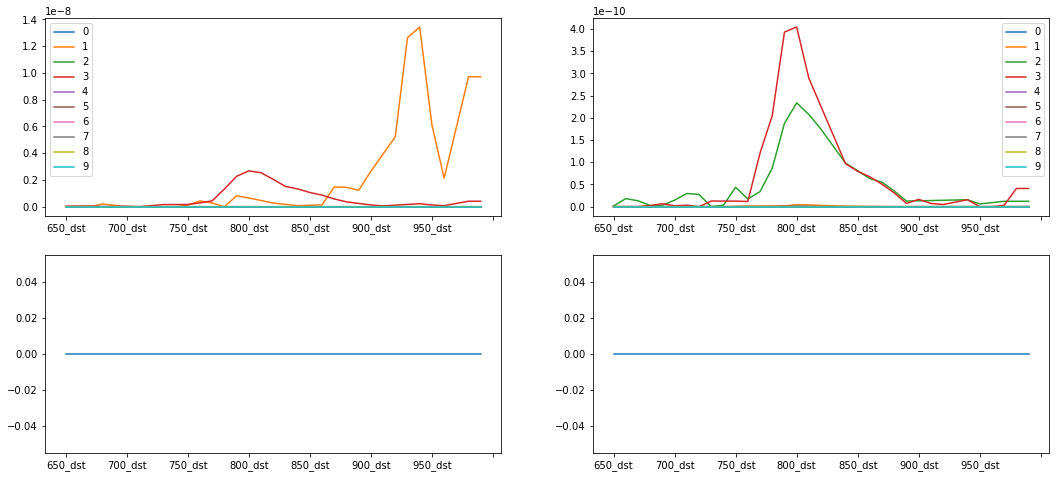

In [29]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)
i = 10
train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

<AxesSubplot:>

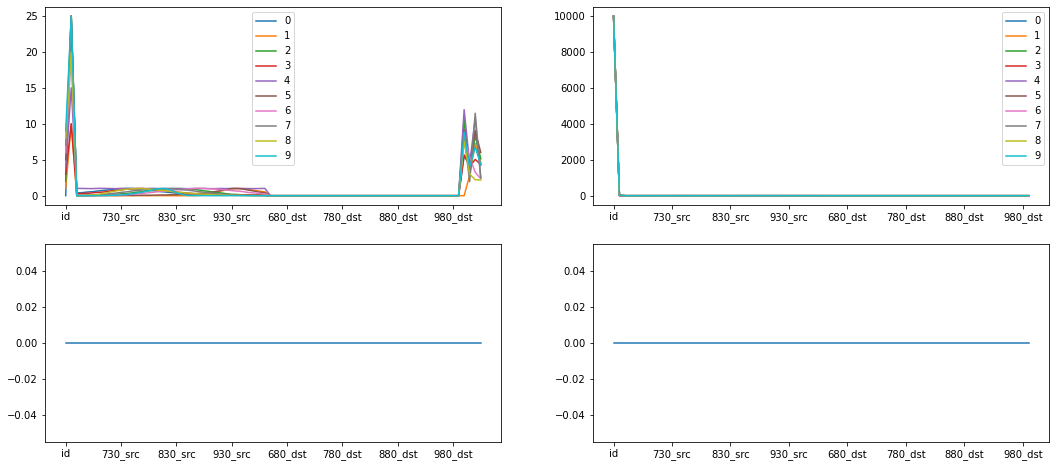

In [30]:
# 지금까지 추출 및 수정 한 값(보간 한 값)을 원본데이터에 업데이트 하기
# 빈 값이 다 채워진 값을 원본에 보내고, 원본을 시각화 시킴

train.update(train_dst_i)
test.update(test_dst_i)

figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)
i = 10
train.head(i).T.plot(ax=ax1)
test.head(i).T.plot(ax=ax2)
train.isna().sum().plot(ax=ax3)
test.isna().sum().plot(ax=ax4)

In [31]:
# lambert-beer 법칙 New Columns 생성

for i in range(35):
    train[f'{650+(i*10)}_ratio'] = np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst']) / (train['rho'] * 0.1)
    test[f'{650+(i*10)}_ratio'] = np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst']) / (test['rho'] * 0.1)

In [32]:
# ratio 2 new columns

for i in range(35):
    train[f'{650 + i*10}_ratio2'] = np.log(train[f'{650 + i*10}_src']/train[f'{650 + i*10}_dst']) 
    test[f'{650 + i*10}_ratio2'] = np.log(test[f'{650 + i*10}_src']/test[f'{650 + i*10}_dst']) 

<AxesSubplot:>

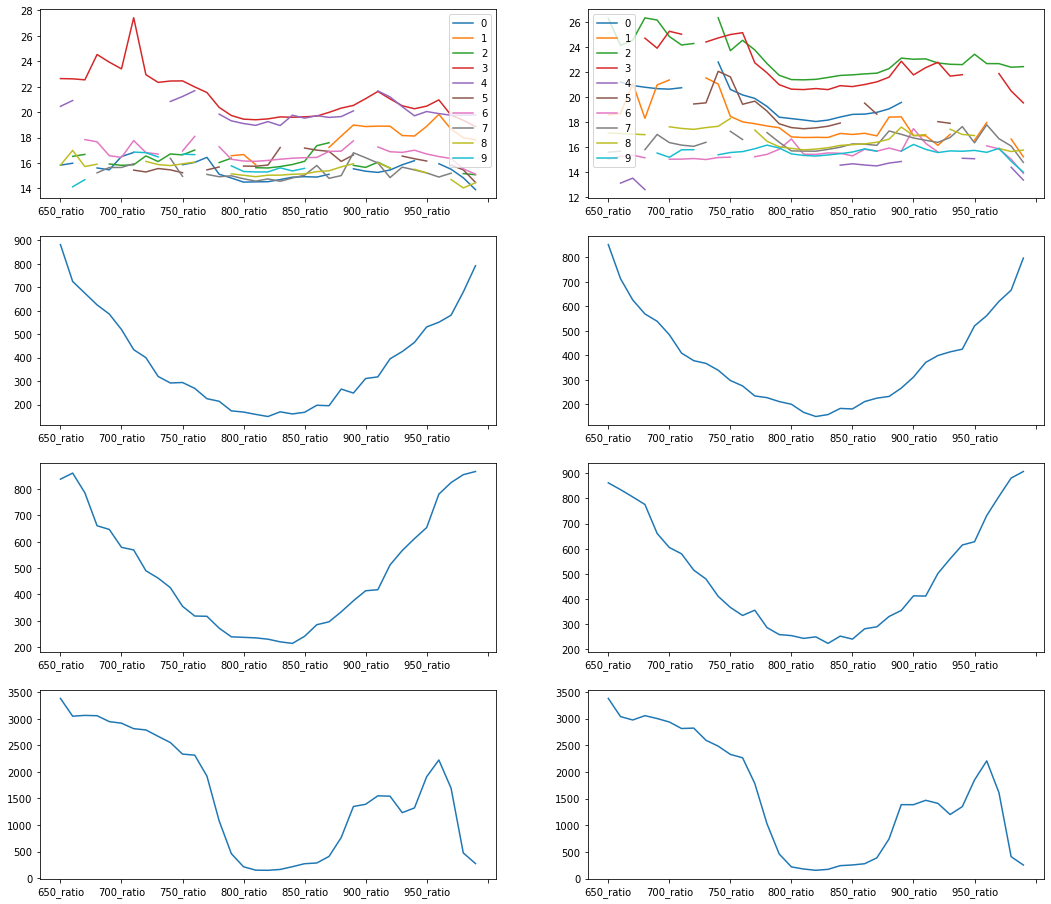

In [33]:
# New Columns(ratio)의 Null 값 찾아보기

figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)
i = 10
train.filter(regex='_ratio$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_ratio$', axis='columns').head(i).T.plot(ax=ax2)
train.filter(regex='_ratio$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_ratio$', axis='columns').isna().sum().plot(ax=ax4)
train.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

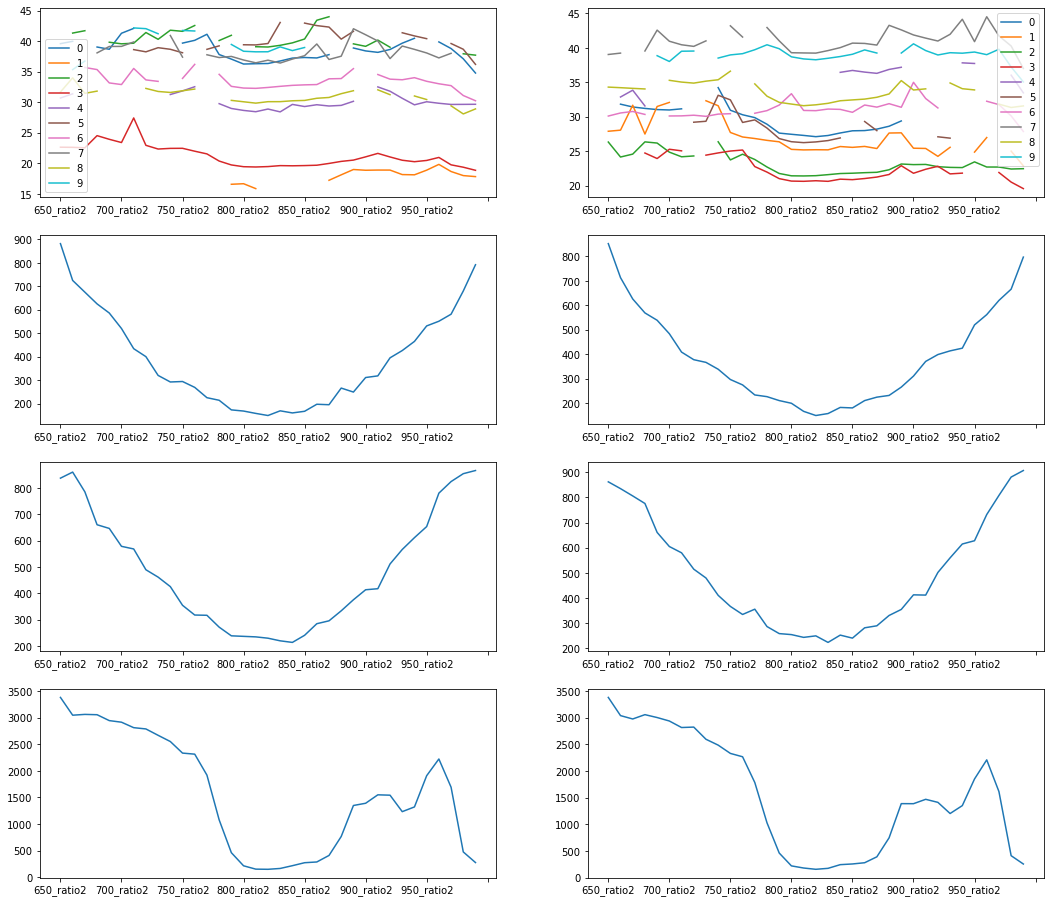

In [34]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10
train.filter(regex='_ratio2$',axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_ratio2$',axis='columns').head(i).T.plot(ax=ax2)
train.filter(regex='_ratio2$',axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_ratio2$',axis='columns').isna().sum().plot(ax=ax4)
train.filter(regex='_ratio2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

In [35]:
# 이미 있는 값을 빈 값으로 만들든, 다른 값으로 변경시키기 (value 치환)

# ----- 빈값을 가진 칼럼 만들기 ----- #
train_r = train.filter(regex='_ratio$',axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
test_r = test.filter(regex='_ratio$',axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

In [36]:
train_r2 = train.filter(regex='_ratio2$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_r2 = test.filter(regex='_ratio2$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)

<AxesSubplot:>

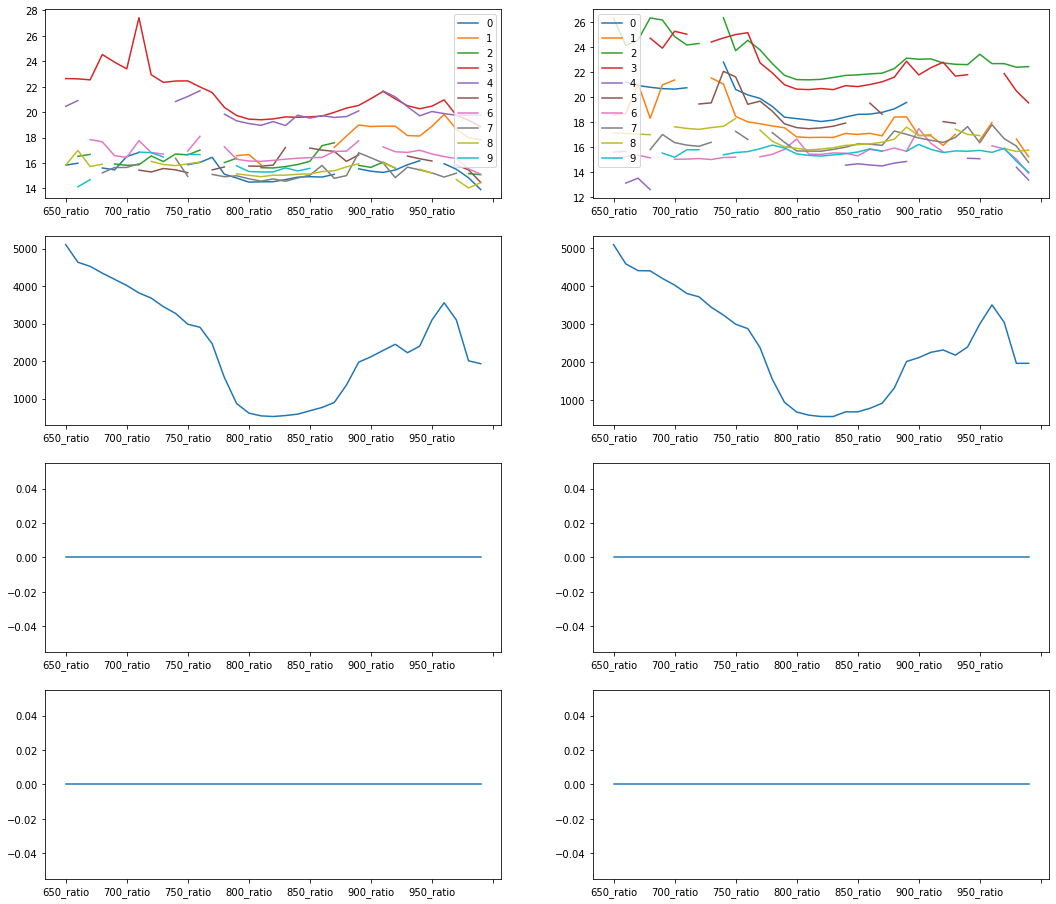

In [37]:
# 빈값으로 만든 컬럼 시각화하기

figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)
i = 10
train_r.head(i).T.plot(ax=ax1)
test_r.head(i).T.plot(ax=ax2)
train_r.isna().sum().plot(ax=ax3)
test_r.isna().sum().plot(ax=ax4)
train_r.isin([float('-inf')]).sum().plot(ax=ax5)
test_r.isin([float('-inf')]).sum().plot(ax=ax6)
train_r.isin([float('inf')]).sum().plot(ax=ax7)
test_r.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

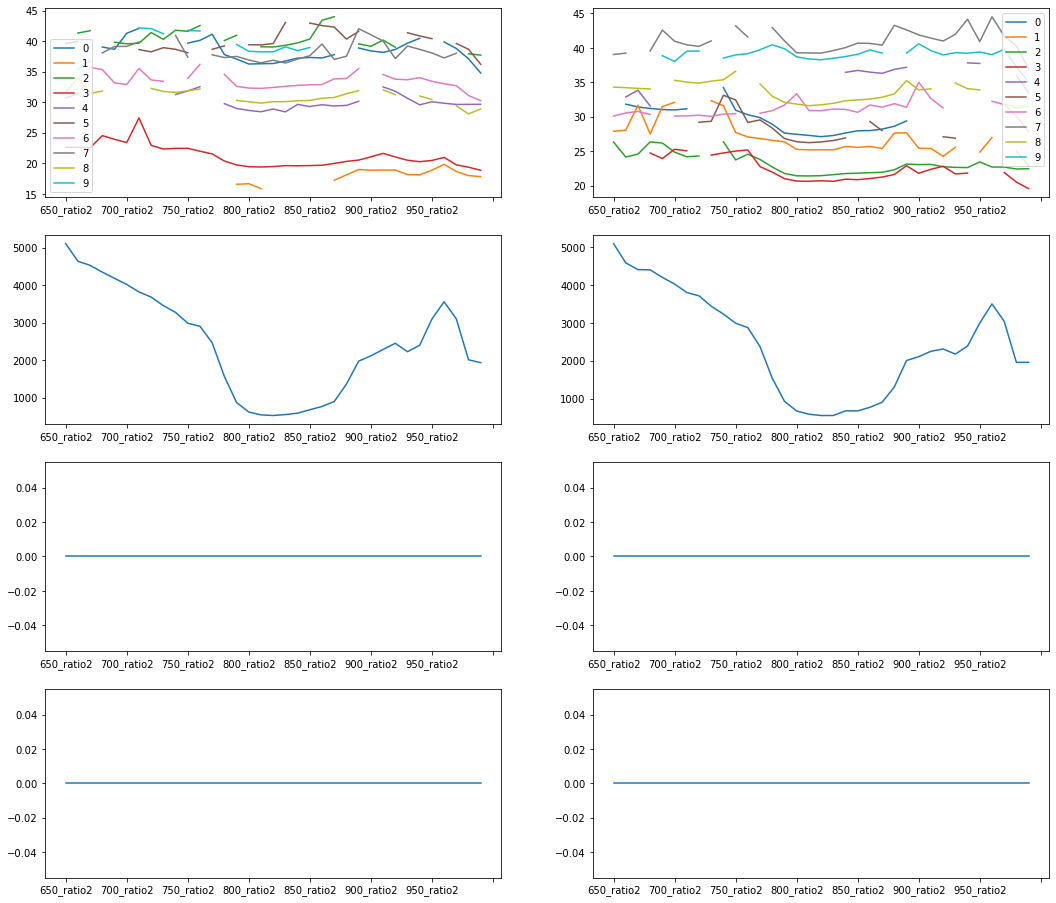

In [38]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10
train_r2.head(i).T.plot(ax=ax1)
test_r2.head(i).T.plot(ax=ax2)
train_r2.isna().sum().plot(ax=ax3)
test_r2.isna().sum().plot(ax=ax4)
train_r2.isin([float('-inf')]).sum().plot(ax=ax5)
test_r2.isin([float('-inf')]).sum().plot(ax=ax6)
train_r2.isin([float('inf')]).sum().plot(ax=ax7)
test_r2.isin([float('inf')]).sum().plot(ax=ax8)

In [39]:
# ----- 빈값 채우기 ----- #

train_r.columns

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')

In [40]:
# list(650+(10*np.arange(35)))

In [41]:
# 문자열 값을 숫자열로 변경하기

train_r.columns = list(650+(10*np.arange(35)))
test_r.columns = list(650+(10*np.arange(35)))
print(train_r.columns)
print(test_r.columns)

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')
Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')


In [42]:
train_r2.columns = list(650 + 10*np.arange(35))
test_r2.columns = list(650 + 10*np.arange(35))
print(train_r2.columns)
print(test_r2.columns)

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')
Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')


In [43]:
train.filter(regex='_ratio$', axis='columns').columns

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')

In [44]:
train.filter(regex='_ratio2$', axis='columns').columns

Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object')

In [45]:
# linear 보간
train_ratio = train_r.interpolate(method='linear',axis=1)
test_ratio = test_r.interpolate(method='linear',axis=1)

# 숫자 => 문자열로 바꾼 걸 train_ratio에 넣는다.
train_ratio.columns = train.filter(regex='_ratio$', axis='columns').columns
test_ratio.columns = train.filter(regex='_ratio$', axis='columns').columns

print(train_ratio.columns)
print(test_ratio.columns)

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')
Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_rat

In [46]:
# ratio2 보간
# linear 보간 
train_ratio2 = train_r2.interpolate(method='linear', axis=1)
test_ratio2 = test_r2.interpolate(method='linear', axis=1)

# 컬럼 원래 _ratio로 변환
train_ratio2.columns = train.filter(regex='_ratio2$', axis='columns').columns
test_ratio2.columns = test.filter(regex='_ratio2$', axis='columns').columns

print(train_ratio2.columns)
print(test_ratio2.columns)

Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object')
Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930

<AxesSubplot:>

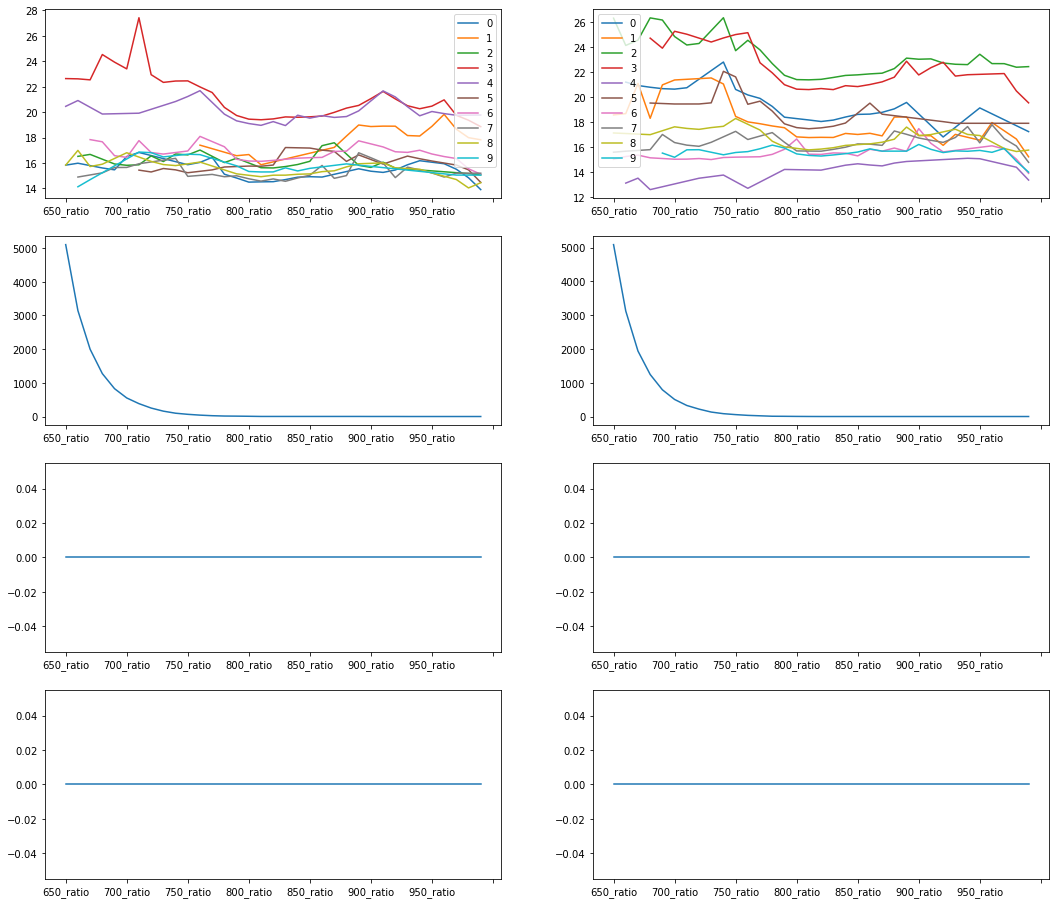

In [47]:
# 보간이 잘 되었는지 시각화자료로 확인한다

figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)
i = 10
train_ratio.head(i).T.plot(ax=ax1)
test_ratio.head(i).T.plot(ax=ax2)
train_ratio.isna().sum().plot(ax=ax3)
test_ratio.isna().sum().plot(ax=ax4)
train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

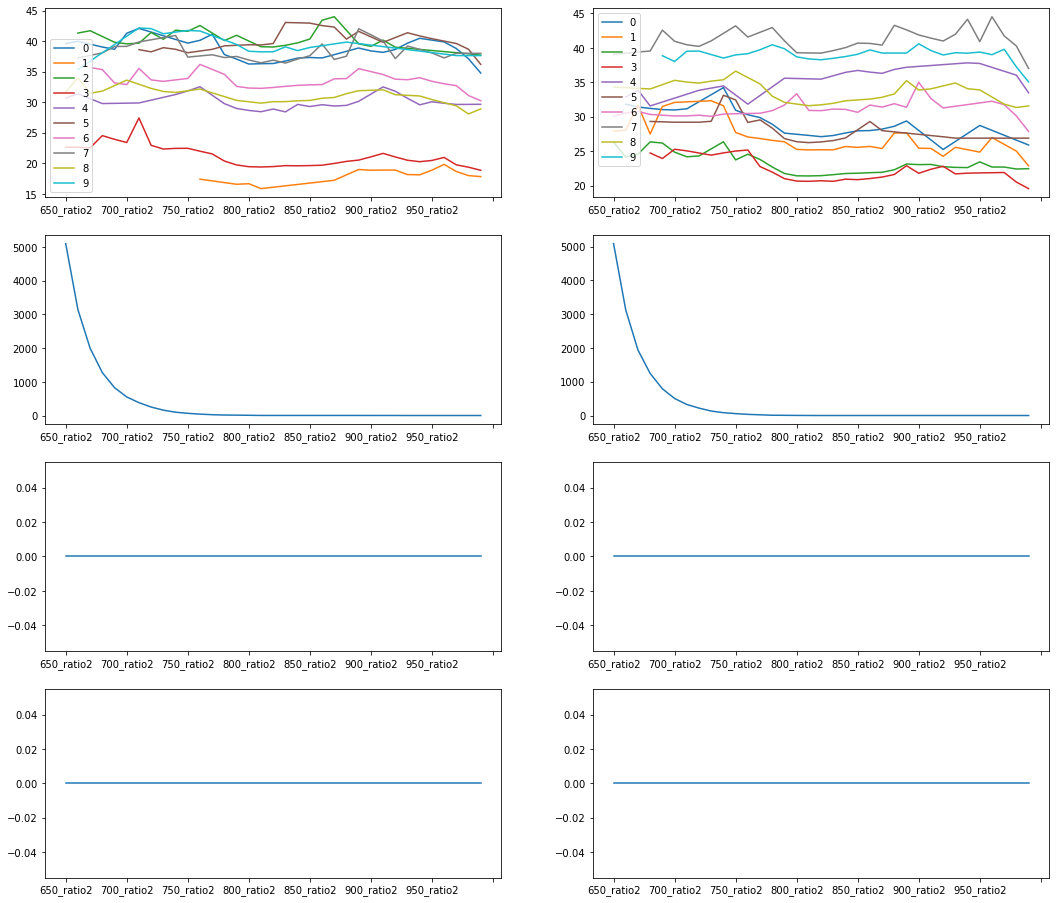

In [48]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10
train_ratio2.head(i).T.plot(ax=ax1)
test_ratio2.head(i).T.plot(ax=ax2)
train_ratio2.isna().sum().plot(ax=ax3)
test_ratio2.isna().sum().plot(ax=ax4)
train_ratio2.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio2.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio2.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio2.isin([float('inf')]).sum().plot(ax=ax8)

In [49]:
# 오른쪽값을 왼쪽으로 보간

for i in range(34):
    train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(), 
                    f'{980-(i*10)}_ratio'] = train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(),
                                                           f'{990-(i*10)}_ratio']
    test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(),
                   f'{980-(i*10)}_ratio'] = test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(),
                                                         f'{990-(i*10)}_ratio']

In [50]:
for i in range(34):
    train_ratio2.loc[train_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                     f'{980-(i*10)}_ratio2'] = train_ratio2.loc[train_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                                                                f'{990-(i*10)}_ratio2']
    test_ratio2.loc[test_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                    f'{980-(i*10)}_ratio2'] = test_ratio2.loc[test_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                                                              f'{990-(i*10)}_ratio2']

<AxesSubplot:>

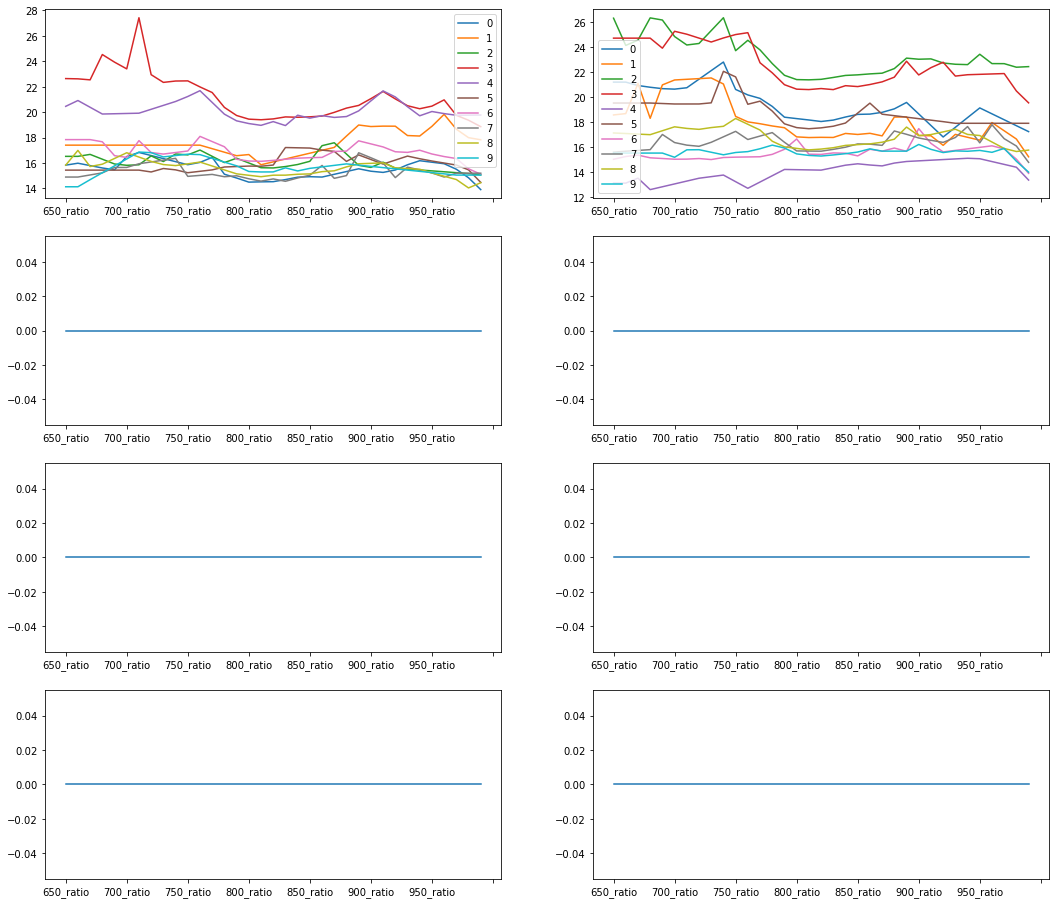

In [51]:
# 요기서도 보간이 잘 되었는지 시각화로 확인한다.

figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)
i = 10
train_ratio.head(i).T.plot(ax=ax1)
test_ratio.head(i).T.plot(ax=ax2)
train_ratio.isna().sum().plot(ax=ax3)
test_ratio.isna().sum().plot(ax=ax4)
train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

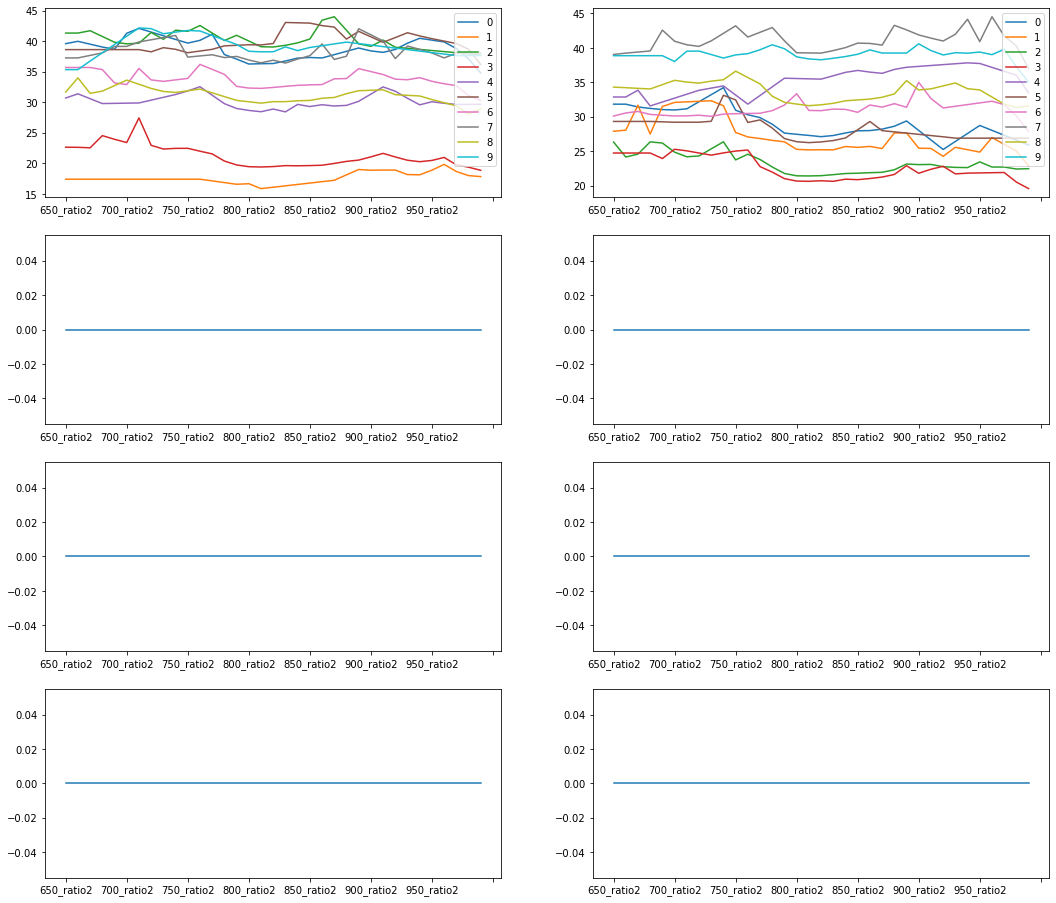

In [52]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10
train_ratio2.head(i).T.plot(ax=ax1)
test_ratio2.head(i).T.plot(ax=ax2)
train_ratio2.isna().sum().plot(ax=ax3)
test_ratio2.isna().sum().plot(ax=ax4)
train_ratio2.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio2.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio2.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio2.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

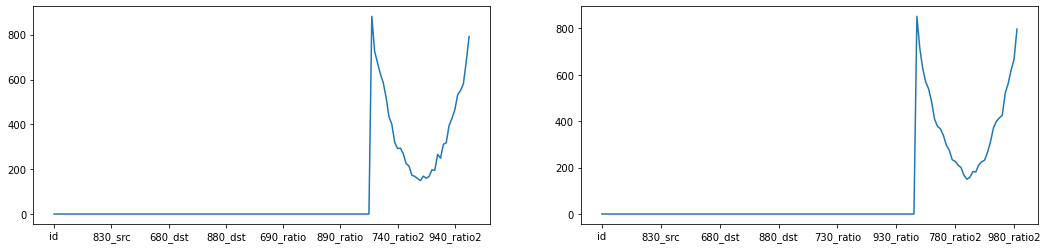

In [53]:
# 이제 전처리한걸 원본데이터에 업데이트한다.

train.update(train_ratio)
test.update(test_ratio)

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
train.isna().sum().plot(ax=ax1)
test.isna().sum().plot(ax=ax2)

<AxesSubplot:>

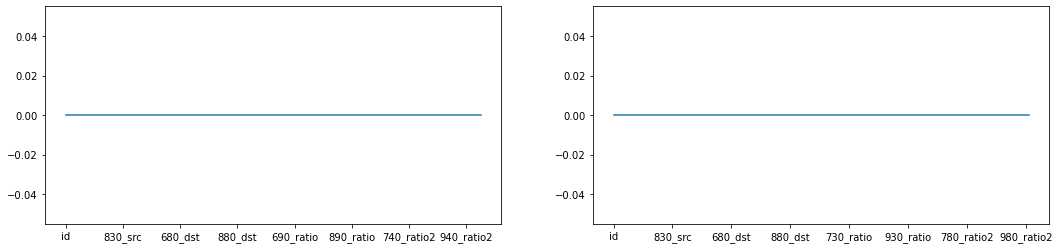

In [54]:
train.update(train_ratio2)
test.update(test_ratio2)

figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

train.isna().sum().plot(ax=ax1)
test.isna().sum().plot(ax=ax2)


<AxesSubplot:>

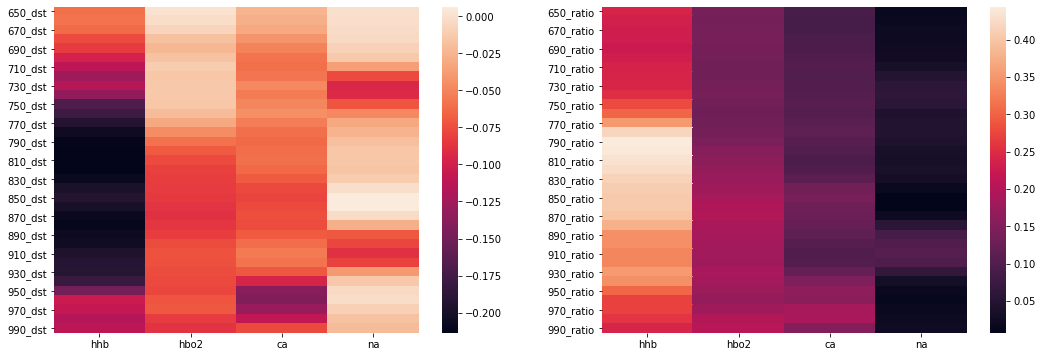

In [55]:
# 경량성을 확인하는 HeaatMap
# 왼쪽은 음의 상관성을 확인한다. (어두울수록 상관성이 높음)
# 오른쪽은 양의 상관성을 확인한다. (밝을수록 상관성이 높음)

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)
sns.heatmap(train.corr().loc['650_dst':'990_dst', 'hhb':'na'],ax=ax1)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio', 'hhb':'na'],ax=ax2)

<AxesSubplot:>

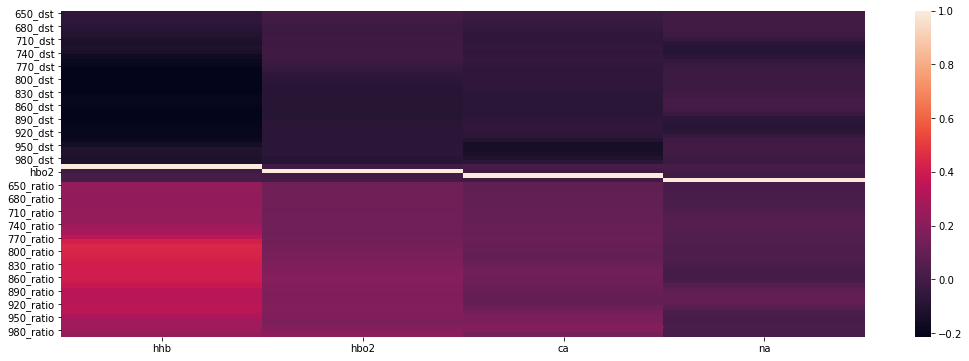

In [56]:
# dst Column 과 ratio Column 중 상관성이 또렷하게 구별이 가능한 칼럼은 ratio 칼럼 (-0.2~1 까지 넓은 구간 중 상관성을 구분하기 때문)
# 그래서 NewColumns인 ratio의 columns이 경량성을 확인하기 좋은 Columns이 된다.
# 즉, 한계의 스펙트럼이 넓은 ratio가 더 좋다 이 말씀.

plt.figure(figsize=(18,6))
sns.heatmap(train.corr().loc['650_dst':'990_ratio', 'hhb':'na'])

## DPF-d
- 상수값 뺴는 것

In [57]:
# 상관성을 확인하기위한 새로운 칼럼 두개를 만들어준다.

for i in range(35) :
    train[f'{650+(10*i)}_ratio_diff'] = train[f'{650+(10*i)}_ratio'] - train['990_ratio']
    test[f'{650+(10*i)}_ratio_diff'] = test[f'{650+(10*i)}_ratio'] - test['990_ratio']
    
for i in range(35) :
    train[f'{650+(10*i)}_ratio_diff2'] = train[f'{650+(10*i)}_ratio'] - (train['850_ratio'] + train['860_ratio']) / 2
    test[f'{650+(10*i)}_ratio_diff2'] = test[f'{650+(10*i)}_ratio'] - (test['850_ratio'] + test['860_ratio']) / 2

In [58]:
for i in range(35):
    train[f'{650 + 10*i}_ratio2_diff'] = train[f'{650 + 10*i}_ratio2'] - train['810_ratio']
    test[f'{650 + 10*i}_ratio2_diff'] = test[f'{650 + 10*i}_ratio2'] - test['810_ratio']

<AxesSubplot:>

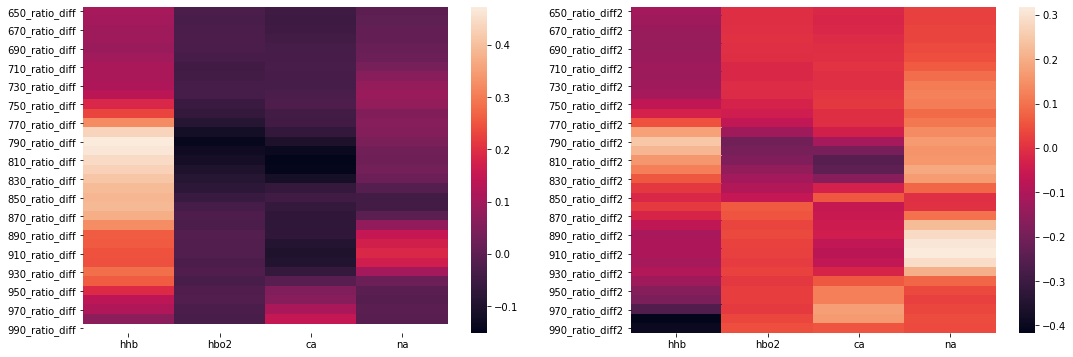

In [59]:
# 경량성을 확인하는 HeaatMap

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)
sns.heatmap(train.corr().loc['650_ratio_diff':'990_ratio_diff', 'hhb':'na'],ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff2':'990_ratio_diff2', 'hhb':'na'],ax=ax2)

<AxesSubplot:>

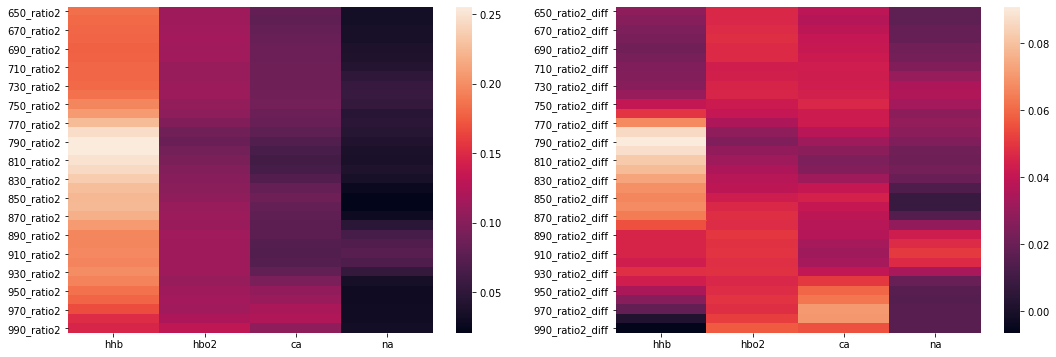

In [60]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc["650_ratio2":"990_ratio2","hhb":"na"],ax=ax1)
sns.heatmap(train.corr().loc["650_ratio2_diff":"990_ratio2_diff","hhb":"na"],ax=ax2)

<AxesSubplot:>

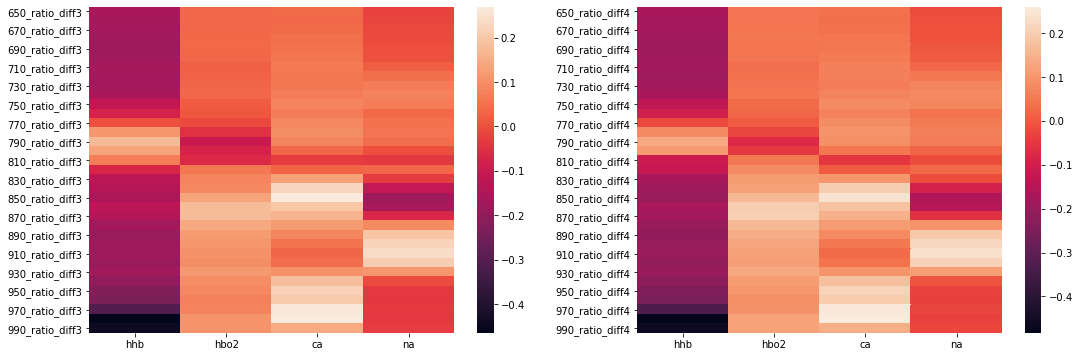

In [61]:
for i in range(35):
    train[f'{650 + 10*i}_ratio_diff3'] = train[f'{650 + 10*i}_ratio'] - (train['810_ratio']+train['820_ratio'])/2
    test[f'{650 + 10*i}_ratio_diff3'] = test[f'{650 + 10*i}_ratio'] - (test['810_ratio']+test['820_ratio'])/2
    
for i in range(35):
    train[f'{650 + 10*i}_ratio_diff4'] = train[f'{650 + 10*i}_ratio'] - (train['800_ratio']+train['810_ratio'])/2
    test[f'{650 + 10*i}_ratio_diff4'] = test[f'{650 + 10*i}_ratio'] - (test['800_ratio']+test['810_ratio'])/2
    
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc["650_ratio_diff3":"990_ratio_diff3","hhb":"na"],ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff4":"990_ratio_diff4","hhb":"na"],ax=ax2)

## 문제

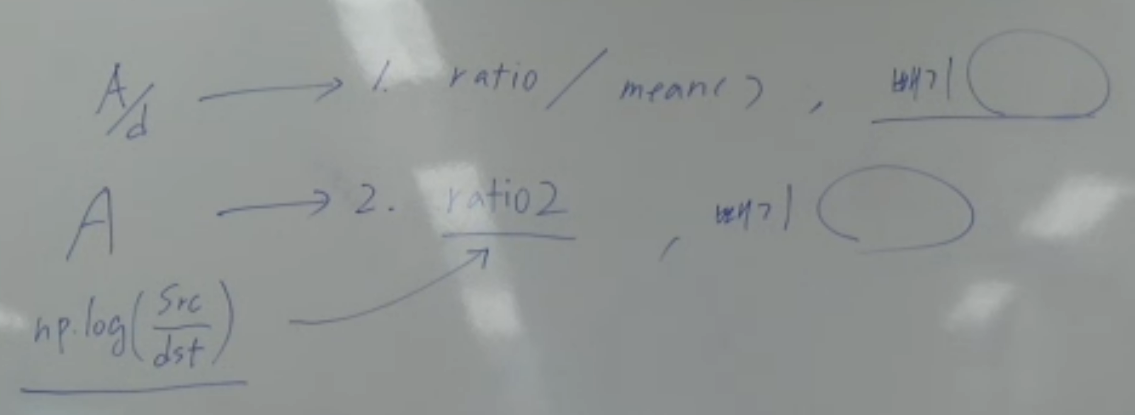

### 1. 평균 대비 dst 칼럼 값의 비율을 새로운 칼럼으로 만들어 보세요

In [62]:
train_ratio = train.filter(regex='_ratio$', axis='columns')
test_ratio = test.filter(regex='_ratio$', axis='columns')

for i in tqdm(train_ratio.index):
    train_ratio.loc[i] = train_ratio.loc[i] / train_ratio.loc[i].replace(0, np.nan).mean()
    
for i in tqdm(test_ratio.index):
    test_ratio.loc[i] = test_ratio.loc[i] / test_ratio.loc[i].replace(0, np.nan).mean()
    
for i in range(35):
    train[f'{650+(10*i)}_ratio_r'] = train_ratio[f'{650+10*i}_ratio']
    test[f'{650+(10*i)}_ratio_r'] = test_ratio[f'{650+10*i}_ratio']

100%|██████████| 10000/10000 [00:06<00:00, 1627.64it/s]


### 2. Lambert-beer 법칙 추가 컬럼을 만들어 보세요
- A = ratio2

In [63]:
for i in range(35):
    train[f'{650+(i*10)}_ratio_r_d'] = np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])
    test[f'{650+(i*10)}_ratio_r_d'] = np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])

<AxesSubplot:>

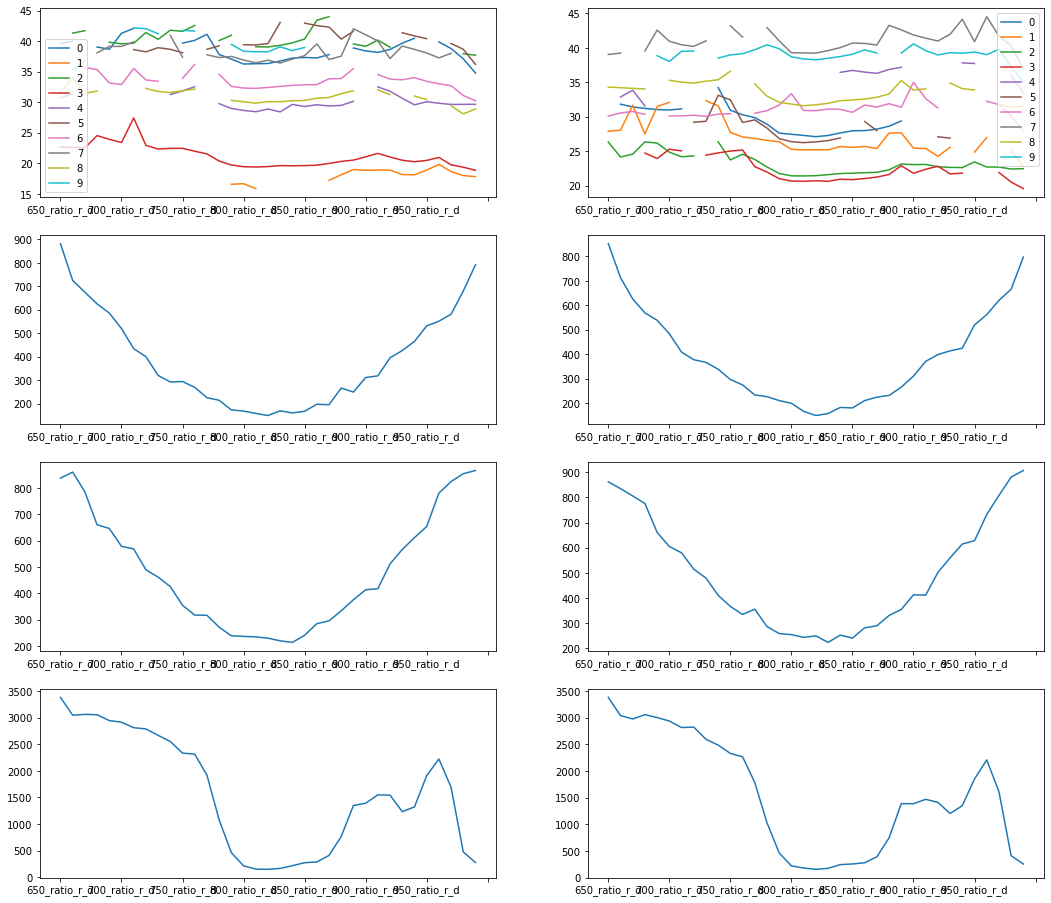

In [64]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 16)

i = 10

train.filter(regex='_ratio_r_d$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_ratio_r_d$', axis='columns').head(i).T.plot(ax=ax2)
train.filter(regex='_ratio_r_d$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_ratio_r_d$', axis='columns').isna().sum().plot(ax=ax4)
train.filter(regex='_ratio_r_d$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio_r_d$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio_r_d$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio_r_d$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

### 3. 790~830 범위를 빼보세요
- A / d = ratio / mean()
- Hbo2, Ca, Na 세 가지에 효율성이 높아진다. (이 말은 즉슨, 상관성을 확인하는 Heatmap에서 데이터를 구별하기가 쉬워진다)

In [70]:
for i in range(35) :
    train[f'{650+(10*i)}_ratio_r_d'] = train[f'{650+(10*i)}_ratio'] - train['790_ratio_r_d']
    test[f'{650+(10*i)}_ratio_r_d'] = test[f'{650+(10*i)}_ratio'] - test['790_ratio_r_d']
    
train.update(train_ratio)
test.update(test_ratio)

figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio_r_d', 'hhb':'na'],ax=ax1)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio_r_d', 'hhb':'na'],ax=ax2)

NameError: name 'train_ratio_r_d' is not defined

In [ ]:
u

In [ ]:
for i in range(35) :
    train[f'{650+(10*i)}_ratio_r_r'] = train[f'{650+(10*i)}_ratio_r'] - train['800_ratio_r']
    test[f'{650+(10*i)}_ratio_r_r'] = test[f'{650+(10*i)}_ratio_r'] - test['800_ratio_r']

for i in range(35) :
    train[f'{650+(10*i)}_ratio_r_r'] = train[f'{650+(10*i)}_ratio_r'] - train['810_ratio_r']
    test[f'{650+(10*i)}_ratio_r_r'] = test[f'{650+(10*i)}_ratio_r'] - test['810_ratio_r']

for i in range(35) :
    train[f'{650+(10*i)}_ratio_r_r'] = train[f'{650+(10*i)}_ratio_r'] - train['820_ratio_r']
    test[f'{650+(10*i)}_ratio_r_r'] = test[f'{650+(10*i)}_ratio_r'] - test['820_ratio_r']

for i in range(35) :
    train[f'{650+(10*i)}_ratio_r_r'] = train[f'{650+(10*i)}_ratio_r'] - train['830_ratio_r']
    test[f'{650+(10*i)}_ratio_r_r'] = test[f'{650+(10*i)}_ratio_r'] - test['830_ratio_r']

## 복습 및 머신러닝

In [ ]:
train_dst = train.filter(regex='_dst$', axis='columns')
test_dst = test.filter(regex='_dst$', axis='columns')

In [ ]:
train_dst.index

In [ ]:
train_dst.loc[0]

In [ ]:
# 평균 대비 dst 칼럼 값의 비율을 새로운 칼럼으로 만듭니다.

train_dst = train.filter(regex='_dst$', axis='columns')
test_dst = test.filter(regex='_dst$', axis='columns')

for i in tqdm(train_dst.index):
    # 빈 값을 넣고 평균을 하면 배제 된다. 계산할 때만 이 값을 사용하고, 원본에는 영향을 끼치지 않는다.
    train_dst.loc[i] = train_dst.loc[i] / train_dst.loc[i].replace(0, np.nan).mean()
    
for i in tqdm(test_dst.index):
    # 빈 값을 넣고 평균을 하면 배제 된다. 계산할 때만 이 값을 사용하고, 원본에는 영향을 끼치지 않는다.
    test_dst.loc[i] = test_dst.loc[i] / test_dst.loc[i].replace(0, np.nan).mean()
    
for i in range(35):
    # 빈 값을 넣고 평균을 하면 배제 된다. 계산할 때만 이 값을 사용하고, 원본에는 영향을 끼치지 않는다.
    train[f'{650+(10*i)}_dst_r'] = train_dst[f'{650+10*i}_dst']
    test[f'{650+(10*i)}_dst_r'] = test_dst[f'{650+10*i}_dst']

In [ ]:
for i in range(35) :
    train[f'{650+(10*i)}_dst_r_d'] = train[f'{650+(10*i)}_dst_r'] - (train['850_dst_r'] + train['860_dst_r']) / 2
    test[f'{650+(10*i)}_dst_r_d'] = test[f'{650+(10*i)}_dst_r'] - (test['850_dst_r'] + test['860_dst_r']) / 2
    
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)
sns.heatmap(train.corr().loc['650_dst_r':'990_dst_r', 'hhb':'na'],ax=ax1)
sns.heatmap(train.corr().loc['650_dst_r_d':'990_dst_r_d', 'hhb':'na'],ax=ax2)

## 머신러닝 맛보기

In [72]:
# input 하고 output 을 나눠준다

Xtrain = train.drop(['id', 'hhb', 'hbo2', 'ca', 'na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb', 'hbo2', 'ca', 'na']]

In [73]:
# 선형 회비 머신러닝

# 값을 정하는 state
base_model = LGBMRegressor(random_state=18)
# 멀티 모델(Default 값)
multi_model = MultiOutputRegressor(base_model)

In [74]:
multi_model

MultiOutputRegressor(estimator=LGBMRegressor(random_state=18))

In [ ]:
# MultiModel로 계산한 것을 pred에 입력시킨다.
# 입력 시키기전 판을 짜놔야해서 빈값으로 만들어놓는다.
y_pred = np.zeros((len(Xtest), 4))
x_pred = np.zeros((len(Xtrain), 4))

# 초기값 하나 생성해줌
result = 0

# 이 친구는 내일 설명
n_splits = 5

#KFold를 5등분한다는 뜻
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1997)
# n 폴더에 index 개념 두개를 분리시킨다.
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    # 학습시키는 것을 표현 : fit
    multi_model.fit(trn_x, trn_y)
    
    # 순환문에서 나오는 학습의 결과값을 5로 나눠서 누적시킨다.
    y_pred += multi_model.predict(Xtest) / n_splits
    
    # 이 친구도 y와 같이 누적
    x_pred += multi_model.predict(Xtrain) / n_splits
    
    # 위의 trn_x, y / val_x, y 에 대한 검증평가
    val_pred = multi_model.predict(val_x)
    
    # 누적값을 넣는데 검증된 것만 넣는다
    result += np.mean((np.abs(val_y - val_pred))) / n_splits
    
    print(result)    

hhb     0.121672
hbo2    0.091914
ca      0.292628
na      0.210318
dtype: float64
hhb     0.247361
hbo2    0.184128
ca      0.581426
na      0.428729
dtype: float64


In [ ]:
# 위의 머신러닝을 통해 Error의 횟수를 조회했고, 그 평균값을 추출한다. (0에 가까울수록 훌륭한 머신러닝)

result.mean()

In [ ]:
result.mean()

## 분석한 데이터값 제출하기

In [ ]:
# 제출할 수 있는 데이터 값

y_pred

In [ ]:
# 제출하는 양식

sub = pd.read_csv('sample_submission.csv', index_col='id')
sub

In [ ]:
# 각각의 Columns 대입시켜서 집어넣는다. 

sub['hhb'] = y_pred[:,0]
sub['hbo2'] = y_pred[:,1]
sub['ca'] = y_pred[:,2]
sub['na'] = y_pred[:,3]

In [ ]:
# 값이 들어간 것을 확인할 수 있다.

sub

In [ ]:
# 값이 들어간 sub를 파일로 만들어서 저장시킨다.

sub.to_csv('20210824_JunBal.csv')